In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
#import geopandas as gpd
from datetime import datetime
from pandas.plotting import scatter_matrix
#from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.basemap import basemap



In [17]:
%matplotlib inline

In [18]:
plt.rcParams['figure.figsize'] = (10,5)

In [19]:
saved_style_state = matplotlib.rcParams.copy()

In [20]:
notCountries = [
    "Europe", 
    "Africa", 
    "North Africa", 
    "Asia & Oceania", 
    "Americas", 
    "Central America and the Caribbean", 
    "North America", 
    "Central Asia", 
    "South Asia", 
    "South-East Asia", 
    "Oceania", 
    "Europe", 
    "Eastern Europe", 
    "Western Europe", 
    "Middle East"
    ]

In [21]:
def clean_out_xxx(value):
    try:
        return float(value)
    except:
        return np.nan



In [22]:
############################### CURRENT USD ################################

currentUSD = pd.read_excel("MilitarySpending.xlsx", sheet_name="Current USD", skiprows=5, skipfooter=8, index_col="Country")

currentUSD.columns = [currentUSD.columns[0]] + [pd.Timestamp(year=y, month=1, day=1) for y in currentUSD.columns[1:]]


currentUSD.drop(notCountries, axis="index", inplace=True)
currentUSD.drop(['Notes'], axis="columns", inplace=True)


currentUSD =  currentUSD.transpose()

for colName in currentUSD.columns:
        currentUSD[colName] = currentUSD[colName].apply(clean_out_xxx)
currentUSD.sample(10)


Country,Algeria,Libya,Morocco,Tunisia,Sub-Saharan,Angola,Benin,Botswana,Burkina Faso,Burundi,...,Kuwait,Lebanon,Oman,Qatar,Saudi Arabia,Syria,Turkey,UAE,Yemen,"Yemen, North"
1989-01-01 00:00:00,854.300945,NaN,990.555090,234.062030,NaN,1948.559396,28.525930,102.798416,66.816506,37.903282,...,2076.390756,NaN,1171.521456,848.461538,12749.866667,1483.652561,3373.741563,NaN,NaN,NaN
1975-01-01 00:00:00,332.252159,287.788253,413.326128,75.323106,NaN,NaN,7.857666,NaN,18.062367,8.533333,...,NaN,165.944100,523.306312,NaN,NaN,887.837838,2284.986255,NaN,NaN,NaN
1949-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,197.681860,NaN,NaN,NaN
2007-01-01 00:00:00,3945.815125,639.137046,2408.350250,490.650559,NaN,2032.432883,NaN,306.451403,107.816728,46.308706,...,4115.736734,1152.238806,3244.603381,1562.225275,35469.513009,1599.033723,14987.758360,8460.993873,1050.499364,NaN
1980-01-01 00:00:00,890.174465,1074.139253,1117.955622,194.096120,NaN,497.359449,23.617948,31.844061,35.360659,27.763333,...,950.805965,503.476315,883.757962,616.740088,20724.493047,2253.248408,2671.976286,NaN,NaN,NaN
1958-01-01 00:00:00,NaN,NaN,41.692278,9.523810,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21.769656,NaN,NaN,71.200000,81.005587,523.131673,NaN,NaN,NaN
2008-01-01 00:00:00,5172.336907,1100.068652,2944.958473,578.911487,NaN,3163.591147,64.724601,332.400254,116.999587,43.856320,...,4430.342077,1169.485904,3462.483745,2317.500000,38222.933333,1732.416848,16809.576495,11571.681416,1196.411766,NaN
1981-01-01 00:00:00,806.569335,557.334522,975.581463,228.835732,NaN,618.891637,17.186114,31.162682,33.915895,29.995556,...,1042.021630,373.214770,1133.468442,1059.505495,24399.927864,2437.707006,2814.869761,NaN,NaN,NaN
1979-01-01 00:00:00,711.681247,853.569149,896.353802,160.900650,NaN,504.712882,17.562828,24.355619,32.032418,20.000000,...,881.077991,346.311001,584.105385,NaN,17616.726771,1581.656051,3001.142306,NaN,NaN,NaN
1985-01-01 00:00:00,953.299654,NaN,692.472050,215.938722,NaN,1146.467010,19.810223,20.997913,27.106617,32.220298,...,1379.869860,227.203509,1617.713053,1528.873626,17656.965219,3510.318471,2365.977436,NaN,NaN,NaN


In [23]:
############################### PER CAPITA #################################

perCapita = pd.read_excel("MilitarySpending.xlsx", sheet_name="Per capita", skiprows=6, skipfooter=8, index_col="Country")

perCapita.columns = [perCapita.columns[0]] + [pd.Timestamp(year=y, month=1, day=1) for y in perCapita.columns[1:]]


perCapita.drop(notCountries, axis="index", inplace=True)
perCapita.drop(['Notes'], axis="columns", inplace=True)


perCapita =  perCapita.transpose()

for colName in perCapita.columns:
        perCapita[colName] = perCapita[colName].apply(clean_out_xxx)


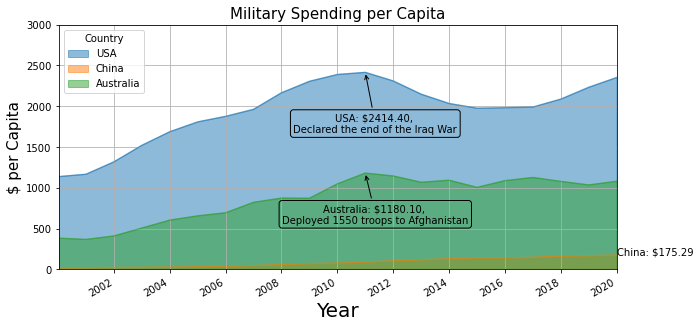

In [24]:
UCA_perCap = perCapita[['USA', 'China', 'Australia']]
ax = UCA_perCap.plot(kind='area', stacked=False)
for column in UCA_perCap:
    try:
        max_val = UCA_perCap[column].max()
        min_val = UCA_perCap[column].min()
        i=UCA_perCap[column].idxmax()
        if column == "USA":
            ax.annotate(f"{column}: ${max_val:.2f}, \nDeclared the end of the Iraq War",
            bbox=dict(boxstyle="round", fc="none", ec="black"),
            xy=(i, max_val), xytext=(10, -60), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
        elif column == "Australia":
            ax.annotate(f"{column}: ${max_val:.2f}, \nDeployed 1550 troops to Afghanistan",
            bbox=dict(boxstyle="round", fc="none", ec="black"),
            xy=(i, max_val), xytext=(10, -50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
        else :
            ax.annotate(f"{column}: ${max_val:.2f}", xy=(i, max_val))

    except Exception as e:
        print(columns, e)
plt.xlim(["2000-01-10", "2020-01-01"])
plt.ylim([0, 3000])
plt.title("Military Spending per Capita", fontsize=15)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("$ per Capita", fontsize=15)
plt.grid(True)

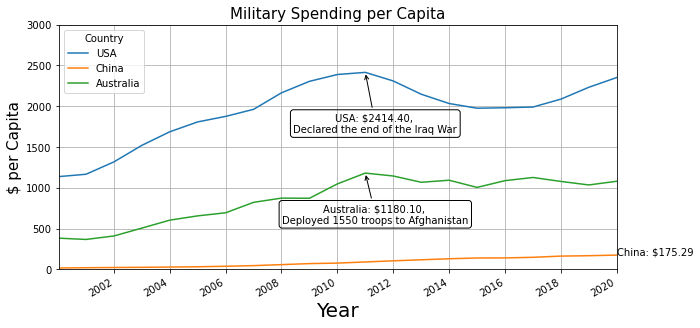

In [25]:
UCA_perCap = perCapita[['USA', 'China', 'Australia']]
ax = UCA_perCap.plot()
for column in UCA_perCap:
    try:
        max_val = UCA_perCap[column].max()
        min_val = UCA_perCap[column].min()
        i=UCA_perCap[column].idxmax()
        if column == "USA":
            ax.annotate(f"{column}: ${max_val:.2f}, \nDeclared the end of the Iraq War",
            bbox=dict(boxstyle="round", fc="none", ec="black"),
            xy=(i, max_val), xytext=(10, -60), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
        elif column == "Australia":
            ax.annotate(f"{column}: ${max_val:.2f}, \nDeployed 1550 troops to Afghanistan",
            bbox=dict(boxstyle="round", fc="none", ec="black"),
            xy=(i, max_val), xytext=(10, -50), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))
        else :
            ax.annotate(f"{column}: ${max_val:.2f}", xy=(i, max_val))

    except Exception as e:
        print(columns, e)
plt.xlim(["2000-01-10", "2020-01-01"])
plt.ylim([0, 3000])
plt.title("Military Spending per Capita", fontsize=15)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("$ per Capita", fontsize=15)
plt.grid(True)

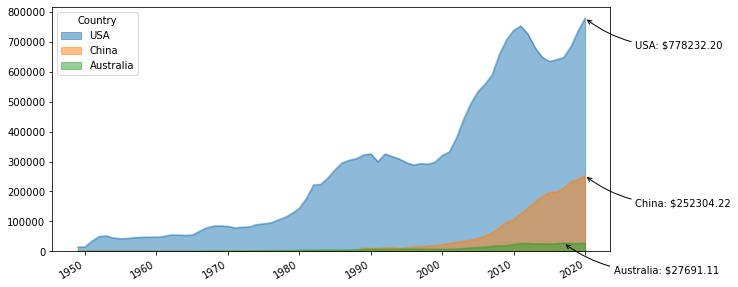

In [26]:
UCA_usd = currentUSD[['USA', 'China', 'Australia']]
bx = UCA_usd.plot(kind='area', stacked=False)
for column in UCA_usd:
    try:
        max_val = UCA_usd[column].max()
        min_val = UCA_usd[column].min()
       # if max_val > min_val*10:
        i=UCA_usd[column].idxmax()
        bx.annotate(f"{column}: ${max_val:.2f}", xy=(i,max_val), 
        xytext=(50, -30), textcoords='offset points',
        arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.2"))
    
    except Exception as e:
        print(columns, e)

#plt.xlim(["1999-01-10", "2020-01-01"])

(10966.0, 18262.0)

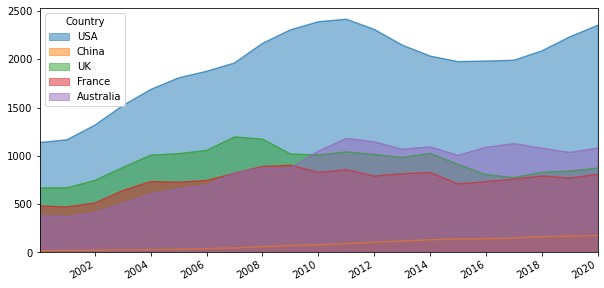

In [27]:
fd3 = perCapita[['USA', 'China', 'UK', 'France', 'Australia']]
fd3.plot(kind = 'area', stacked=False)
plt.xlim(['2000-01-10', '2020-01-01'])

array([[<AxesSubplot:xlabel='UK', ylabel='UK'>,
        <AxesSubplot:xlabel='France', ylabel='UK'>,
        <AxesSubplot:xlabel='Australia', ylabel='UK'>,
        <AxesSubplot:xlabel='Germany', ylabel='UK'>],
       [<AxesSubplot:xlabel='UK', ylabel='France'>,
        <AxesSubplot:xlabel='France', ylabel='France'>,
        <AxesSubplot:xlabel='Australia', ylabel='France'>,
        <AxesSubplot:xlabel='Germany', ylabel='France'>],
       [<AxesSubplot:xlabel='UK', ylabel='Australia'>,
        <AxesSubplot:xlabel='France', ylabel='Australia'>,
        <AxesSubplot:xlabel='Australia', ylabel='Australia'>,
        <AxesSubplot:xlabel='Germany', ylabel='Australia'>],
       [<AxesSubplot:xlabel='UK', ylabel='Germany'>,
        <AxesSubplot:xlabel='France', ylabel='Germany'>,
        <AxesSubplot:xlabel='Australia', ylabel='Germany'>,
        <AxesSubplot:xlabel='Germany', ylabel='Germany'>]], dtype=object)

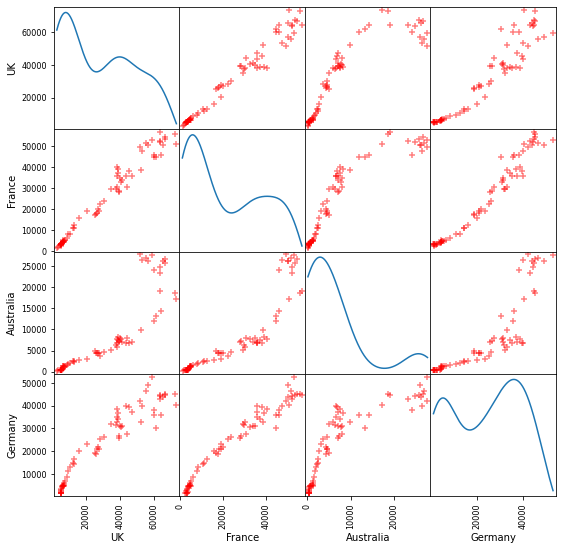

In [28]:
scatter = currentUSD[['UK', 'France', 'Australia', "Germany"]]
scatter_matrix(scatter, alpha=0.5, figsize=(9, 9), diagonal='density', marker='+', color='red')
#hist_kwds={'bins':30}

(16445.0, 18262.0)

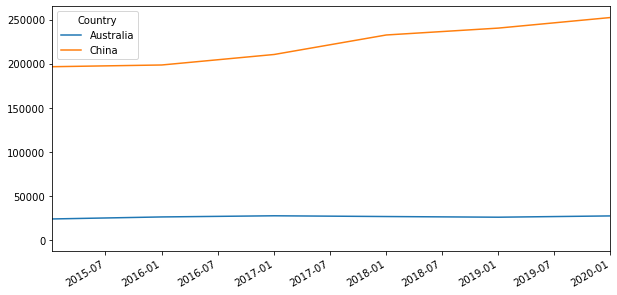

In [29]:
fd3 = currentUSD[['Australia', 'China']]
fd3.plot()
plt.xlim(['2015-01-10', '2020-01-01'])

In [223]:
battleDeaths = pd.read_csv("BattleDeaths.csv", index_col='Entity')
# grouped_lists = grouped_df["Battle-related deaths"].apply(list)
# grouped_lists = grouped_lists.reset_index()
# stacked = battleDeaths.stack()
# stacked.head(10)
#battleDeaths.head(20)


In [224]:
deaths = battleDeaths.groupby(['Entity']).agg({'Battle-related deaths': lambda x: list(x)})
deaths = deaths.transpose()
dfDeaths = countries

dfDeaths = pd.DataFrame(dfDeaths)
dfDeathsUSA = dfDeaths["Americas"]
dfDeathsUSA


Battle-related deaths    [1000.0, 4000.0, 2000.0, 40.0, 34.0, 0.0, 0.0,...
Name: Americas, dtype: object

In [226]:
years = battleDeaths.groupby(['Entity']).agg({'Year': lambda y: list(y)})
years = years.transpose()
dfYears = years

dfYears = pd.DataFrame(dfYears)
dfYearsAmerica = dfYears["Americas"]
dfYearsAmerica



Year    [1946, 1947, 1948, 1949, 1950, 1951, 1952, 195...
Name: Americas, dtype: object

In [242]:
for i in range(len(dfYearsAmerica)):
    indexNum = ("'{0}', ").format(i)
    deathFrame = pd.DataFrame(columns=["Americas"], index=[indexNum])
    deathFrame.loc[i] = pd.Series({'Americas': dfYearsAmerica})
    deathFrame

In [251]:

#for i in range(len(dfYearsAmerica)):
    #locLoop = ("'{0}'".format(i))
df5 = pd.DataFrame(columns=["Americas"], index=['Year'])
df5.loc['1950'] = pd.Series({"Americas": 50})
df5

,Americas
Year,NaN
1950,50


<AxesSubplot:>

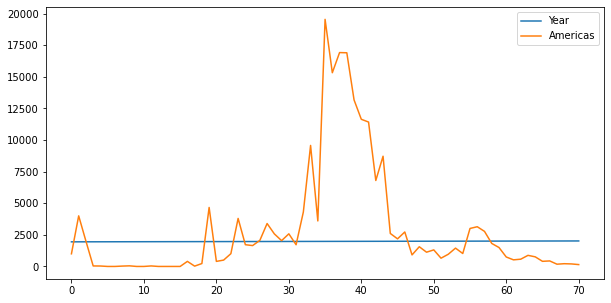

In [301]:
data = {'Year': [1946, 1947, 1948, 1949, 1950, 
                1951, 1952, 1953, 1954, 1955, 1956, 
                1957, 1958, 1959, 1960, 1961, 1962, 
                1963, 1964, 1965, 1966, 1967, 1968, 
                1969, 1970, 1971, 1972, 1973, 1974, 
                1975, 1976, 1977, 1978, 1979, 1980, 
                1981, 1982, 1983, 1984, 1985, 1986, 
                1987, 1988, 1989, 1990, 1991, 1992, 
                1993, 1994, 1995, 1996, 1997, 1998, 
                1999, 2000, 2001, 2002, 2003, 2004, 
                2005, 2006, 2007, 2008, 2009, 2010, 
                2011, 2012, 2013, 2014, 2015, 2016], 
    'Americas': [1000.0, 4000.0, 2000.0, 40.0, 34.0,
                0.0, 0.0, 28.0, 48.0, 0.0, 0.0, 40.0, 0.0, 0.0,
                0.0, 0.0, 400.0, 25.0, 230.0, 4665.0, 400.0, 502.0, 
                1010.0, 3797.0, 1720.0, 1650.0, 2061.0, 3395.0, 2575.0,
                2040.0, 2580.0, 1717.0, 4300.0, 9570.0, 3599.0, 19541.0,
                15320.0, 16913.0, 16898.0, 13168.0, 11638.0, 11419.0, 
                6798.0, 8716.0, 2609.0, 2183.0, 2726.0, 912.0, 1558.0, 
                1127.0, 1309.0, 653.0, 964.0, 1449.0, 1023.0, 3004.25, 
                3141.0, 2772.75, 1819.0, 1497.0, 748.0, 522.0, 574.0, 
                877.0, 760.0, 405.0, 436.0, 178.0, 217.0, 199.0, 147.0]}

df500 = pd.DataFrame(data)
df500.set_index('Year')
df500.head(50)
# fd5 = currentUSD["USA"]
# fd5.plot()
#f500.plot()
# for ind in df500.index:
#     print(df500['Year'][ind], df500['Americas'][ind])


In [254]:
for i in range(len(dfYearsAmerica)):
    print(dfYearsAmerica[i])

[1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [221]:
for i in range(len(dfDeathsUSA)):
    print(dfDeathsUSA[i])

[1000.0, 4000.0, 2000.0, 40.0, 34.0, 0.0, 0.0, 28.0, 48.0, 0.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 400.0, 25.0, 230.0, 4665.0, 400.0, 502.0, 1010.0, 3797.0, 1720.0, 1650.0, 2061.0, 3395.0, 2575.0, 2040.0, 2580.0, 1717.0, 4300.0, 9570.0, 3599.0, 19541.0, 15320.0, 16913.0, 16898.0, 13168.0, 11638.0, 11419.0, 6798.0, 8716.0, 2609.0, 2183.0, 2726.0, 912.0, 1558.0, 1127.0, 1309.0, 653.0, 964.0, 1449.0, 1023.0, 3004.25, 3141.0, 2772.75, 1819.0, 1497.0, 748.0, 522.0, 574.0, 877.0, 760.0, 405.0, 436.0, 178.0, 217.0, 199.0, 147.0]


In [206]:
df = battleDeaths[["Battle-related deaths"]]
dt = currentUSD[["USA"]]
dt.plot(kind='area')
df.plot(kind='area')
#df.plot(kind='bar', legend=None)

<AxesSubplot:xlabel='Entity'>

Error in callback <function flush_figures at 0x000001EE3709C1F0> (for post_execute):


KeyboardInterrupt: 